## Analyze A/B Test Results



This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [7]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [8]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [9]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [10]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [11]:
len(df.query('converted == "1"').user_id)/len(df.user_id)*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [12]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [13]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)
df2.shape

(290585, 5)

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop(1899,axis=0) 
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
len(df2[df2['converted']== 1])/len(df2)


0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
len(df2.query("converted == 1 and group =='control'"))/len(df2.query("group =='control'"))*100

12.03863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
len(df2.query("converted == 1 and group =='treatment'"))/len(df2.query("group =='treatment'"))*100

11.880724790277405

d. What is the probability that an individual received the new page?

In [23]:
len(df2[df2['landing_page']== "new_page"])/len(df2)*100

50.00636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
> The probabilities of converting for both treatment and control group are  similar. There is no sufficient evidence to support that the new page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$H_0: \ 𝑝_{old} - \ 𝑝_ {new} \ge 0$$

$$H_1: \ 𝑝_{old} - \ 𝑝_ {new} \lt 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
#the new conversion rate under the null
p_new =len(df2.query("converted == 1"))/len(df2)
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
#the old conversion rate under the null
p_old= len(df2.query("converted == 1"))/len(df2)
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
#the new number of individuals in the treatment group
n_new=len(df2.query("landing_page == 'new_page' and group == 'treatment'"))
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
#the old number of individuals in the treatment group
n_old= len(df2.query("landing_page == 'old_page' and group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#Simulation of n_new with p_new under the null
new_page_converted = np.random.binomial(1, p_new,n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
#Simulation of n_old with p_old under the null
old_page_converted = np.random.binomial(1, p_old,n_new)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
#the difference between the stimulated converted p_new & p_old
new_page_converted.mean() - old_page_converted.mean()

0.00021333553550660633

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new,n_new)
    old_page_converted = np.random.binomial(1, p_old,n_new)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

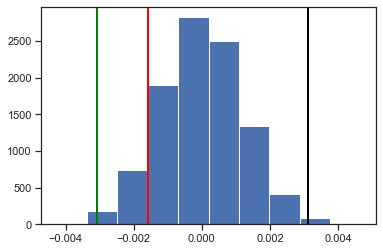

In [68]:
#the obseved values 
actual_new = len(df2.query("landing_page == 'new_page' and converted == 1"))/n_new
actual_old = len(df2.query("landing_page == 'old_page' and converted == 1"))/n_old
actual_obs = actual_new - actual_old
# view 99% confidence interval
low,upper=np.percentile(p_diffs,.5),np.percentile(p_diffs,99.5)
low,upper 
plt.hist(p_diffs);
plt.axvline(actual_obs,color='red',linewidth=2); #dding the observed value
plt.axvline(x=low,color='green',linewidth=2); 
plt.axvline(x=upper,color='black',linewidth=2);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
#the mean of the # of times where the stimulated p larger than obseved p
np.mean(p_diffs > actual_obs)

0.9044

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The null hypothesis states that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. The p value that we calculated is equal to 0.90 which is greater than 0.05. We can conclufe that we failed to reject the null hypothesis. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_new = len(df2.query("landing_page == 'new_page' and converted == 1"))
convert_old = len(df2.query("landing_page == 'old_page' and converted == 1"))
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
#statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3116075339133115 0.905173705140591


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> The two methods produced similar results.The p value = 0.90 which is greater than 0.05 and we also failed to reject the null hypothesis.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic Regression is suitable in our case since we want to predict 1 of 2 possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept'] = 1
df2[['A','ab_page']]= pd.get_dummies(df2['group'])
df2.drop(['A'],axis=1, inplace = True)
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
#I used this package istead of statsmodels because I had trouble importing logit
import pingouin as pg
from pingouin import logistic_regression
pg.logistic_regression(df2[['intercept', 'ab_page']],df2['converted'])

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.988778,0.008063,-246.669034,0.000000,-2.004580,-1.972976
1,ab_page,-0.014995,0.011434,-1.311428,0.189713,-0.037405,0.007415


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
pg.logistic_regression(df2[['intercept', 'ab_page']],df2['converted'])

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.988778,0.008063,-246.669034,0.000000,-2.004580,-1.972976
1,ab_page,-0.014995,0.011434,-1.311428,0.189713,-0.037405,0.007415


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> The two tests have different purposes and their results are not similar and can not be compared. In part II, our goal was to test if the new page is better than the old page and our null hypothesis was there is no different or the old one is better. The p-value is important to compare it with a threshold ( in this case is 0.05) and decide if the null is rejected; the p-value was 0.9 and we failed to reject the null hypothesis. 
> In part III, the p-value associated with ab_page = 0.19. However, logistic regression analysis predicts the outcome in a binary variable which has only two possible outcomes.The p-value in this test indicates an existence of relationship between the variables.And since that 0.19 > 0.05 there is no correlation between the variables.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Findin the more factors that may influence the converted process can improve these models. However,there are soome disadvantages including:

> 1- overfitting or Underfitting: a large set of independent variables that have no relation to the dependent variable that being predicted , some variables will in general be falsely found to be statistically significant. 

>2- Multicollinearity : when two or more independent variables in a regression model are highly linearly related.




g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [54]:
#reading file an unique
df3 = pd.read_csv('countries.csv')
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [60]:
#joining the two df
df_new = pd.merge(df2, df3, on='user_id')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [62]:
#create dummy variable
df_new[['UK', 'US', 'CA']]= pd.get_dummies(df_new['country'])
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [65]:
#fitting the regression model
pg.logistic_regression(df_new[['intercept', 'UK', 'CA']],df2['converted'])

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.987342,0.011409,-174.185028,0.000000,-2.009704,-1.964980
1,UK,-0.051508,0.028406,-1.813274,0.069790,-0.107183,0.004167
2,CA,-0.009112,0.013297,-0.685263,0.493178,-0.035175,0.016950


> The p-vales are > 0.05 which indicate that country has no significant impact on conversion. A p-value higher than 0.05 is not statistically significant and indicates strong evidence for the null hypothesis and our null hypothesis states that these factors have no impact on the conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
# to find the interaction between page and country 
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
#fitting the regression model and getting the summary
pg.logistic_regression(df_new[['intercept', 'UK_ab_page', 'CA_ab_page']],df2['converted'])

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.979265,0.012737,-155.395259,0.000000,-2.004229,-1.954301
1,ab_page,-0.016257,0.011434,-1.421746,0.155100,-0.038667,0.006154
2,UK,-0.051423,0.028406,-1.810262,0.070255,-0.107098,0.004252
3,CA,-0.009078,0.013298,-0.682682,0.494808,-0.035141,0.016985


> The p-vales are > 0.05 which indicate that country has no significant impact on conversion, and the ab_page has no effect except for UK_ab_page. We still unable to reject the null hypothesis.



<a id='conclusions'></a>
## Conclusion

> the main purpose of this project is to understand if company should implement the new page, keep the old page, or run the experiment longer to make a better decision.

>The result from part I (Probability) concludes that the probability of conversion for the two group, treatment and control, are closely equal.

>In part II , we used two method to test our hypothesis, null hypothesis states that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, and the p value for the two tests is equal to 0.90 which is greater than 0.05. Therefore, we failed to reject the null hypothesis.

>Finally, we test Logistic Regression models in part III. In this part we added a new information which was the country of the individual included in the survey. The p-vales are > 0.05 which indicate that also country and has no significant impact on conversion.

>Based on these results , we can see that the new page did not produce a significant effect. These conclusions maybe misleading and other factors needed to improve the result. Also, running the experiment longer can be useful in decision-making.


